In [2]:
import os
import json
import uuid
import random

import numpy as np
import cv2
from matplotlib import pyplot as plt


In [49]:
os.mkdir(os.path.join(os.getcwd(), 'data', 'CombinedDatasets'))

# copy everything is data/CombinedDatasetsChallenge to data/CombinedDatasets - use os package
os.system('cp -r data/CombinedDatasetsChallenge/* data/CombinedDatasets/')

0

In [50]:
for folder in ["train", "test", "valid"]:
    path = os.path.join(os.getcwd(), 'data', 'shipdataset', folder)
    for image in os.listdir(os.path.join(path, 'images')):
        unique_filename = str(uuid.uuid4())
        extension = image.split('.')[-1]
        os.system('cp {} {}'.format(os.path.join(path, 'images', image), os.path.join(os.getcwd(), 'data', 'CombinedDatasets', 'images', 'train', unique_filename + '.' + extension)))
        # create a txt file with the same name as the image in the labels folder, just add "0 0.5 0.5 1 1" to it
        with open(os.path.join(os.getcwd(), 'data', 'CombinedDatasets', 'labels', 'train', unique_filename + '.txt'), 'w') as f:
            f.write('0 0.5 0.5 1 1')


In [5]:
def plot_bbox(im, bbox, label, color=(0,255,0), thickness=2, show=True):
    # Plots a bounding box given the coordinates of the top left and bottom right corners
    x0, y0, x1, y1 = bbox
    cv2.rectangle(im,(x0,y0),(x1,y1),color,thickness)
    cv2.putText(image,label,(x0, y0 - 2),cv2.FONT_HERSHEY_SIMPLEX,0.75,[225, 255, 255],thickness=2)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    if show:
        plt.imshow(im)
        plt.show()
    return im

In [130]:
# make path data/compressedversionv2/images/train
os.mkdir(os.path.join(os.getcwd(), 'data', 'compressedversionv2'))
os.mkdir(os.path.join(os.getcwd(), 'data', 'compressedversionv2', 'images'))
os.mkdir(os.path.join(os.getcwd(), 'data', 'compressedversionv2', 'images', 'train'))

# make path data/compressedversionv2/labels/train
os.mkdir(os.path.join(os.getcwd(), 'data', 'compressedversionv2', 'labels'))
os.mkdir(os.path.join(os.getcwd(), 'data', 'compressedversionv2', 'labels', 'train'))

imagefilename_to_id = {}


for dataset in ["train", "val"]:
    with open(os.path.join(os.getcwd(), 'data', 'compressedversion', 'annotations', f"instances_{dataset}.json"), 'r') as f:
        annotations = json.load(f)

    random.shuffle(annotations["images"])

    for image in annotations["images"]:
        image_id = image["id"]

        # copy the image from the compressed version to the CombinedDatasets folder
        unique_filename = str(uuid.uuid4())
        imagefilename_to_id[unique_filename] = image_id

        extension = image["file_name"].split('.')[-1]
        annotations_image = [annotation for annotation in annotations["annotations"] if annotation["image_id"] == image_id and annotation["category_id"] <=5]

        if len(annotations_image) == 0:
            continue
        
        annotation_lines = []
        for ann in annotations_image:
            bbox = ann["bbox"]
            category_id = ann["category_id"]
            
            if category_id == 2 or category_id == 3:
                category_id = 0
            else:
                category_id = 1
            
            x0, y0, x1, y1 = bbox
            x0, y0, x1, y1 = x0/image["width"], y0/image["height"], x1/image["width"], y1/image["height"]

            # convert to yolo format
            x_center = x0 + x1/2
            y_center = y0 + y1/2
            width = x1
            height = y1
            
            annotation_lines.append(f'{category_id} {x_center} {y_center} {width} {height}\n')

        # classLabel, x0, y0, x1, y1 = annotation_lines[0].split(' ')
        # x0, y0, x1, y1 = float(x0), float(y0), float(x1), float(y1)
        # x0, y0, x1, y1 = x0*image["width"], y0*image["height"], x1*image["width"], y1*image["height"]

        # box = np.array([x0, y0,x0+x1, y0+y1,], dtype = np.float32)
        # box = box.round().astype(np.int32).tolist()
        # plot_bbox(cv2.imread(os.path.join(os.getcwd(), 'data', 'compressedversion', 'images', dataset, image["file_name"])), classLabel, box)
        # 1/0
        
        # create a txt file with the same name as the image in the labels folder
        with open(os.path.join(os.getcwd(), 'data', 'compressedversionv2', 'labels', 'train', unique_filename + '.txt'), 'w') as f:
            for annotation_line in annotation_lines:
                f.write(annotation_line)

        os.system('cp {} {}'.format(os.path.join(os.getcwd(), 'data', 'compressedversion', 'images', dataset, image["file_name"]), os.path.join(os.getcwd(), 'data', 'compressedversionv2', 'images', "train", unique_filename + '.' + extension)))

        # get all annotations

85f0dae6-0631-4302-b3a6-b5338cac57d5.jpg
0 0.5 0.5 1 1


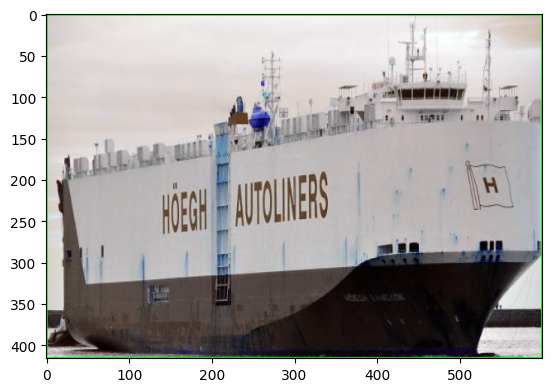

In [6]:
# choose a random image from the CombinedDatasetsChallenge folder and plot the bounding box
datafolder = os.path.join(os.getcwd(), 'data', 'CombinedDatasets')
filename = random.choice(os.listdir(os.path.join(datafolder,  'images', 'train')))

print(filename)
image = cv2.imread(os.path.join(datafolder, 'images', 'train', filename))
labels = open(os.path.join(datafolder, 'labels', 'train', filename.split('.')[0]+".txt"), 'r').readlines()

for label in labels:
    label = label.strip()
    print(label)
    classLabel, x0, y0, x1, y1 = label.split(' ')[:5]
    x0, y0, x1, y1 = float(x0), float(y0), float(x1), float(y1)
    x0, y0, x1, y1 = x0*image.shape[1], y0*image.shape[0], x1*image.shape[1], y1*image.shape[0]

    box = np.array([x0-x1/2, y0-y1/2,x0+x1/2, y0+y1/2,], dtype = np.float32)
    box = box.round().astype(np.int32).tolist()
    image = plot_bbox(image, box, classLabel, show=False)
_=plot_bbox(image, box, classLabel)


In [248]:
# Remove objects that are too small from the dataset compressedversionv2
os.mkdir(os.path.join(os.getcwd(), 'data', 'compressedversionv2', 'labelsfiltered'))
os.mkdir(os.path.join(os.getcwd(), 'data', 'compressedversionv2', 'labelsfiltered', 'train'))
from tqdm import tqdm
print(datafolder)

images_removed = 0

for image in tqdm(os.listdir(os.path.join(datafolder, 'images', 'train'))):
    im = cv2.imread(os.path.join(datafolder, 'images', 'train', image))
    height, width, _ = im.shape
    labels = open(os.path.join(datafolder, 'labels', 'train', image.split('.')[0]+".txt"), 'r').readlines()

    filtered_labels = []
    for label in labels:
        label = label.strip()
        classLabel, x0, y0, x1, y1 = label.split(' ')[:5]
        x0, y0, x1, y1 = float(x0), float(y0), float(x1), float(y1)
        x0, y0, x1, y1 = x0*width, y0*height, x1*width, y1*height

        if x1 < width * 0.01 or y1 < height * 0.01:
            continue
        
        filtered_labels.append(label)
    
    if len(filtered_labels) == 0:
        images_removed += 1
        os.remove(os.path.join(datafolder, 'images', 'train', image))

    with open(os.path.join(os.getcwd(), 'data', 'compressedversionv2', 'labelsfiltered', 'train', image.split('.')[0]+".txt"), 'w') as f:
        for label in filtered_labels:
            f.write(label + '\n')

print(images_removed)

/Users/pradyumnaym/sem1/dl/YOLOv7-DL23/data/compressedversionv2


100%|██████████| 10477/10477 [03:37<00:00, 48.27it/s]

303
